<a href="https://colab.research.google.com/github/DevTedd/Zindi_Financial_Inclusion_Challenge/blob/main/Zindi_Africa_Financial_Inclusion_Machine_Learning_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion Prediction using python

# About
You are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . You will train your model on 70% of the data and test your model on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

The main dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

# Process

 All my steps will be documented and the process wil follow an established pattern of Introduction > Analysis > Prediction > Evaluation. I tend to add notes in the cells as i go along

* Defining the Question
* Reading the data
* Checking the data
* External data source validation
* Tidying the dataset
* Exploratory data analysis
* Implimenting the solution
* Challenging the solution
* Follow up questions

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#Mounting colab to drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#First step as always is to import our data and libraries 
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Data
train = pd.read_csv('/content/drive/MyDrive/Zindi Challenge/Finacial Inclusion /Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Zindi Challenge/Finacial Inclusion /Test.csv')
defs = pd.read_csv('/content/drive/MyDrive/Zindi Challenge/Finacial Inclusion /VariableDefinitions.csv')


In [5]:
#Lets take a look at our data and its format 
train.shape

(23524, 13)

In [6]:
test.shape

(10086, 12)

In [7]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [9]:
#Lets see what data is in our columns 
defs

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


**Focusing now on our training dataset**

In [12]:
#Now that we have a nice overview, well start focusing on our train dataset
train.head(5)
#Most of the dataset is categorical varables, we will need to do some label encoding later 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
#Lets do some exploration of it
train.info()
#No missing values in any column, our bank_account is our dependent variable 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [14]:
#lets check for duplicated rows
train.duplicated().sum()

0

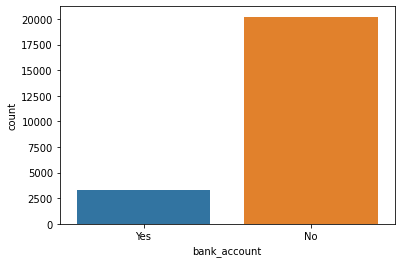

In [15]:
#Lets do some univariate analysis
sns.countplot(x = train['bank_account'])
#We can see that most people in the train set dont have a bank account

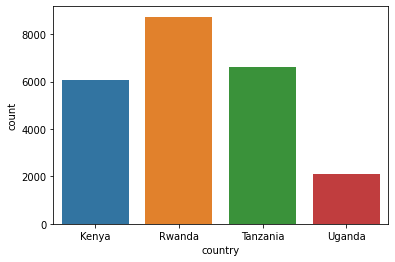

In [16]:
sns.countplot(x=train['country'])
#Lets see the distribution per country, most respondents are from rwanda
#the least are from uganada

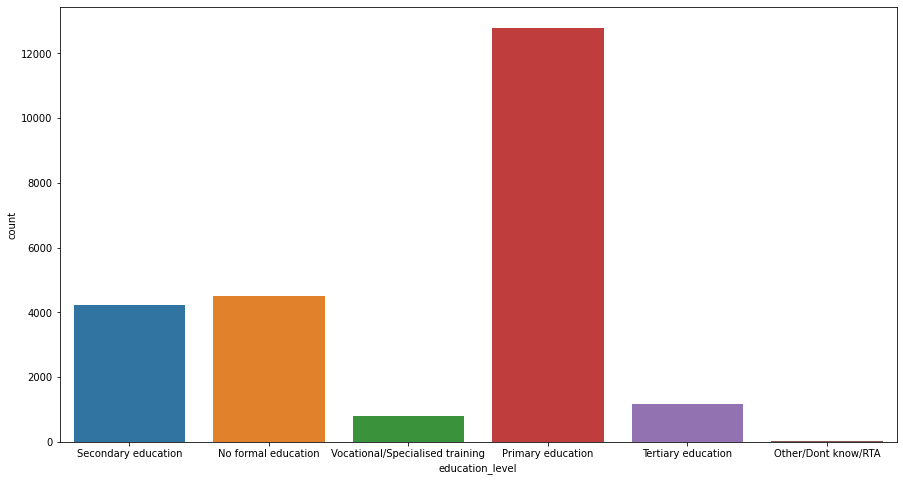

In [17]:
#How about the education level, most educated people tend to have access to bank accounts
plt.figure(figsize=(15, 8))
sns.countplot(x = train['education_level'])
#Most people have recieved a primary level education

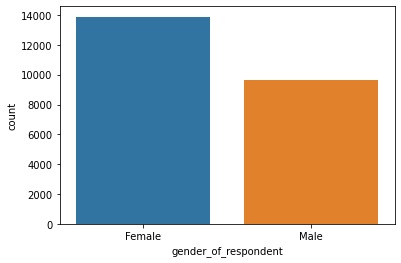

In [18]:
sns.countplot(x=train['gender_of_respondent'])
#Majority of the respondents were female, this is interseting as most bread winners
#in lower income families tend to be male. Migt influence the training

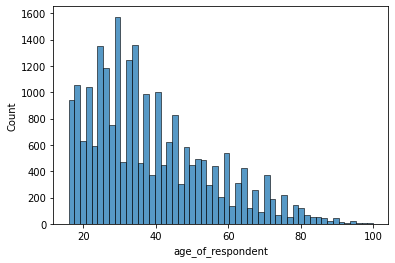

In [19]:
#Lets visualize the age distribution
sns.histplot(x=train['age_of_respondent'])
#The majority of respondents are betwen their early 20s and late 30s

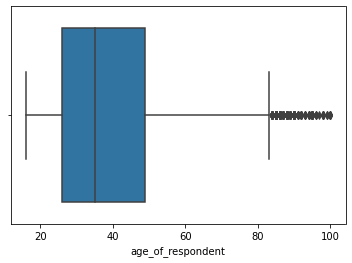

In [20]:
sns.boxplot(x=train['age_of_respondent'])
#This column has a few outliers on the older side, past 80 yrs

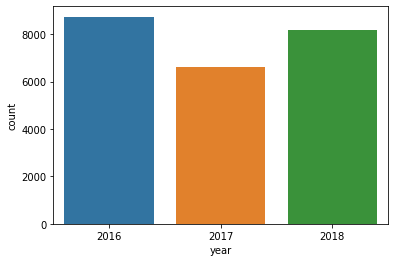

In [21]:
sns.countplot(x=train['year'])
#Most responses occured in 2016 -> 2018 -> 2017

# Moving on to biariate and multivarate analysis 

Text(0.5, 1.0, 'Count of respondents that have accounts, Separated by Country')

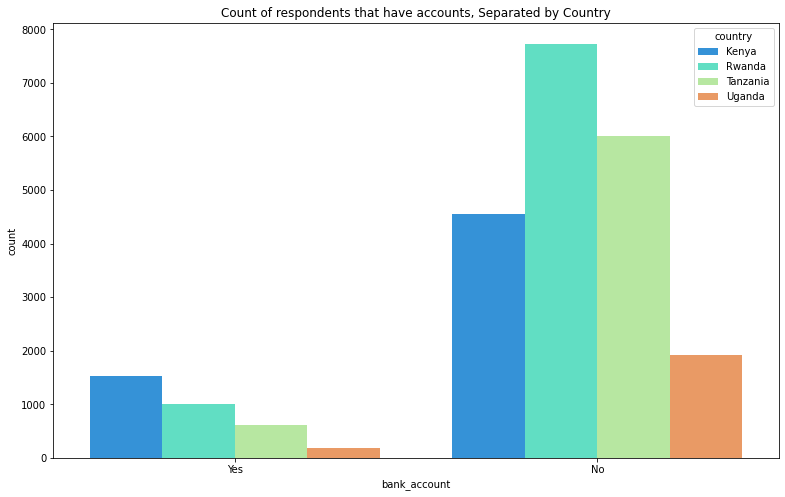

In [22]:
#Well focus on how the other features are related to having a bank account
plt.figure(figsize=(13,8))
sns.countplot(x='bank_account',data=train, palette='rainbow',hue='country')
plt.title("Count of respondents that have accounts, Separated by Country")

The most respondents without accounts come from Rwanda and the ones with the most bank accounts come from Kenya. Uganda is the lowest for both

Text(0.5, 1.0, 'Distribution of Age by Passenger Class')

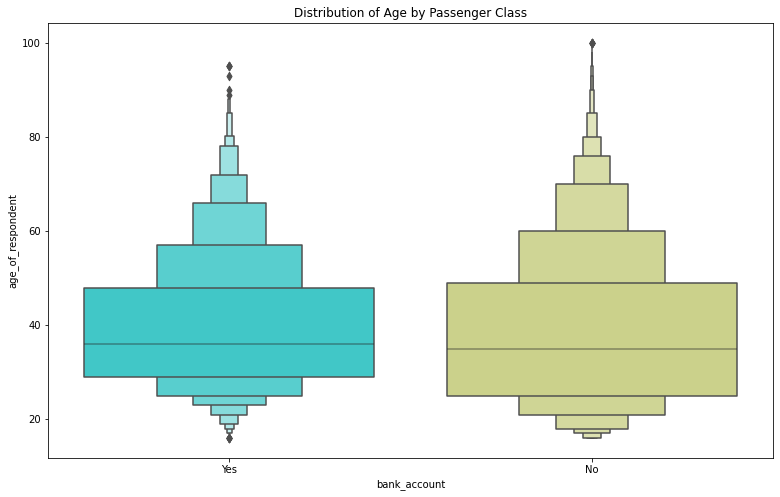

In [23]:
#Well focus on how the other features are related to having a bank account
plt.figure(figsize=(13,8))
sns.boxenplot(x='bank_account', y='age_of_respondent', data=train, palette='rainbow')
plt.title("Distribution of Age by Passenger Class")

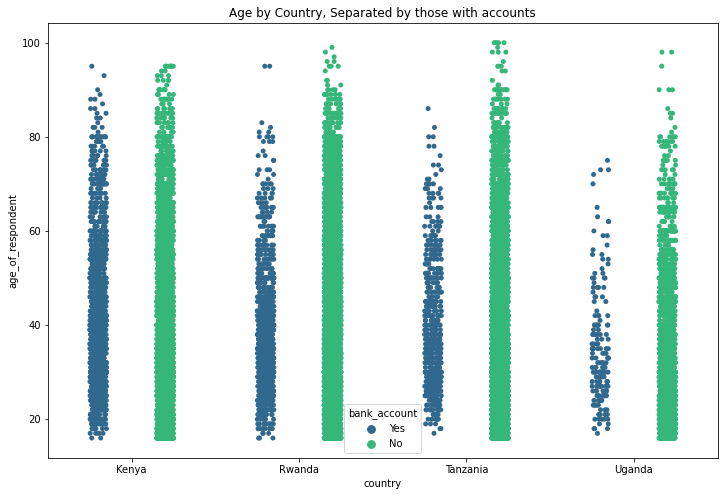

In [24]:
plt.figure(figsize=(12,8))
plt.title("Age by Country, Separated by those with accounts")
sns.stripplot(x='country', y='age_of_respondent', data=train, jitter=True, hue='bank_account', dodge=True, palette='viridis')

In [25]:
#Time to see the correlation betwen features
train.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


This is as far as i can go without changing the categorical values to number, load up the encoding 

In [26]:
#Lets find our object columns 
objList = train.select_dtypes(include = "object").columns
#We have to omit the unique id column and country
objList = objList.drop(labels=['uniqueid', 'country'])
print (objList)

Index(['bank_account', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')


In [27]:
#Transforming them into integers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for feat in objList:
    train[feat] = lb.fit_transform(train[feat])

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.3+ MB
None


In [28]:
#Lets take a look at it
train.head(6)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5
5,Kenya,2018,uniqueid_6,0,0,0,7,26,0,5,2,2,5


In [29]:
#Lets visualize the correlation again
dc = train.corr()
dc

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
year,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,0.001801,-0.026187,0.173869,0.266323
bank_account,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,0.001801,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,-0.026187,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011
education_level,0.173869,0.323768,0.126128,0.252970,0.001613,-0.352970,0.119883,-0.017141,-0.123628,1.000000,0.043823


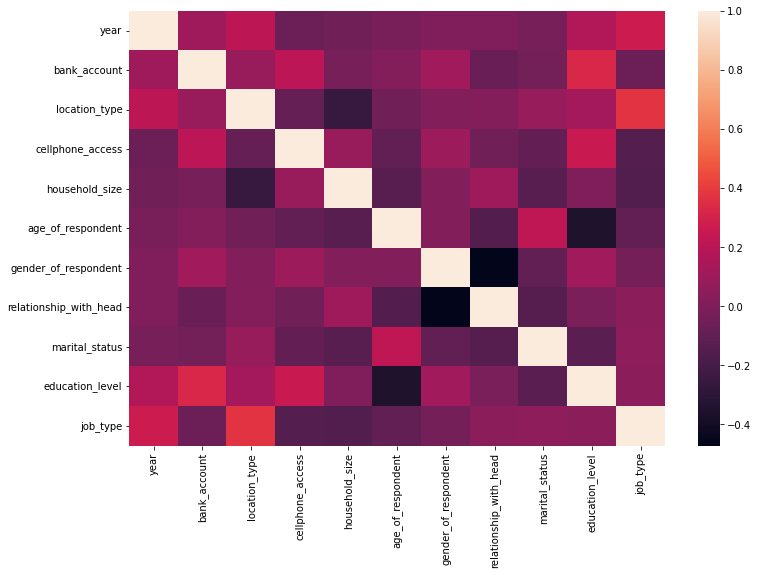

In [30]:
#Lots of numbers, lets use a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dc)
#The closer a cube is to a white color the higher the corelation

Education background, the year and access to cellphones has the largest impact in having a bank account

# This might change but my plan is to use the just a few features a user can use to predict the variables

# Begin feature selection 

In [32]:
# Starting the Solution
# We will begin to train our models and assess their acuracy 
train['bank_account'].unique()

array([1, 0])

The aim would be to categorise user based using feature to discover if they have a bank account

In [35]:
#Importing Tensor flow
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras import losses

2.7.0


In [40]:
df = train
df = df.drop(['uniqueid','year','country'], axis =1,inplace=True)
df
#Removig the ids, we just want the numerical values present 

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,3,24,0,5,2,3,9
1,0,0,0,5,70,0,1,4,0,4
2,1,1,1,5,26,1,3,3,5,9
3,0,0,1,5,34,0,1,2,2,3
4,0,1,0,8,26,1,0,3,2,5


In [42]:
# Splitting the dataset into train and test for the model
from sklearn.model_selection import train_test_split
X = df.drop(['bank_account'], axis = 1)
y = df['bank_account']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a machine learning model
**Build a tf.keras.Sequential model by stacking layers**

In [43]:
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
                                  
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
cellphone_access,1.032562
education_level,0.916884
location_type,0.632031
gender_of_respondent,0.359530
age_of_respondent,0.029739
household_size,-0.019762
relationship_with_head,-0.022183
marital_status,-0.065937
job_type,-0.084339


# Inline with my previous assumptions in descending order of importance : 
* Cellphone access
* Education level
* Location type
* Gender
* Age


Have the most impact to the possibility of a respondent having a bank account

In [44]:
#feature scaling using MinMaxScaler for standadization of values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
#loading the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [46]:
# creating an instance
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam')

**Fitting the model via 200 epochs**

In [47]:
model.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
515/515 [==============================] - 2s 3ms/step - loss: 0.3860 - val_loss: 0.3397
Epoch 2/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3344 - val_loss: 0.3222
Epoch 3/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3234 - val_loss: 0.3170
Epoch 4/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3194 - val_loss: 0.3153
Epoch 5/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3181 - val_loss: 0.3153
Epoch 6/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3151 - val_loss: 0.3130
Epoch 7/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3153
Epoch 8/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3082
Epoch 9/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3128 - val_loss: 0.3113
Epoch 10/200
515/515 [==============================] - 1s 2ms/step - loss: 0.3121 - val_lo

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss      

<Figure size 864x576 with 0 Axes>

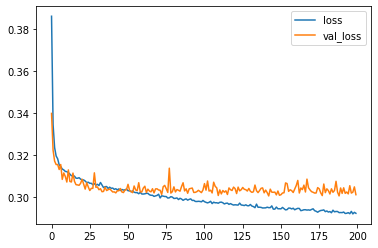

In [56]:
#Lets visualize the losses during training 
plt.figure(figsize=(12,8))
model_loss.plot()
#The loss values seem to improve with the number of epochs, during the next run we will use 300 to see if anything changes

In [54]:
model_loss.plot()
#model prediction
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
predictions
#The issue with this predictions is our dependent variable is binary, well set the difference at 0.5 to make the results applicable

array([[0.03633559],
       [0.15998966],
       [0.11829636],
       ...,
       [0.01949096],
       [0.02715299],
       [0.2322619 ]], dtype=float32)

In [55]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[5871  202]
 [ 655  330]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6073
           1       0.62      0.34      0.44       985

    accuracy                           0.88      7058
   macro avg       0.76      0.65      0.68      7058
weighted avg       0.86      0.88      0.86      7058



The models accuracy is at 88% which is extreemly well, im happy with this but lets see if we can improve it

# Challenging the Solution

In [63]:
#I have time today so ill do 350 epochs we see if more time training improves the result
model.fit(x=X_train, y=y_train, epochs=250,validation_data=(X_test, y_test), verbose=1)

Epoch 1/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2828 - val_loss: 0.3153
Epoch 2/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2831 - val_loss: 0.3150
Epoch 3/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2824 - val_loss: 0.3103
Epoch 4/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2823 - val_loss: 0.3130
Epoch 5/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2826 - val_loss: 0.3104
Epoch 6/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2822 - val_loss: 0.3124
Epoch 7/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2819 - val_loss: 0.3139
Epoch 8/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2826 - val_loss: 0.3135
Epoch 9/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2814 - val_loss: 0.3125
Epoch 10/250
515/515 [==============================] - 1s 2ms/step - loss: 0.2819 - val_lo

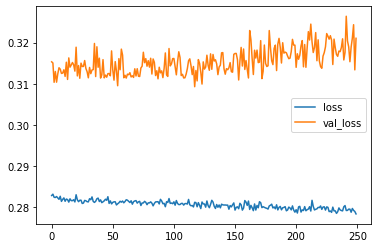

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Looks like the pattern of learning changed alot. The range of losses has reduced, lets check the metrics we see

In [65]:
#model prediction
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
predictions

array([[0.02435431],
       [0.04658312],
       [0.10034803],
       ...,
       [0.01889056],
       [0.08708242],
       [0.23788685]], dtype=float32)

In [66]:
#model prediction
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[5907  166]
 [ 678  307]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6073
           1       0.65      0.31      0.42       985

    accuracy                           0.88      7058
   macro avg       0.77      0.64      0.68      7058
weighted avg       0.86      0.88      0.86      7058



# Lets play around with our perdictions by first using a decision tree classifier 

In [69]:
X = df.drop(['bank_account'], axis = 1)
y = df['bank_account']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8212539851222104


This isnt a bad result at 82%, lets try another classifier 

# The next one is Random Forest



In [71]:
from sklearn.ensemble import RandomForestClassifier
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8548352816153029


Looks like we already found the best MLP to use, lets tune those features to get the best accuracy possible 

# RmsProp

In [72]:
# creating an instance
model_v3 = Sequential()

model_v3.add(Dense(units=12,activation='relu'))
model_v3.add(Dense(units=12,activation='relu'))
model_v3.add(Dense(units=12,activation='relu'))
model_v3.add(Dense(units=12,activation='relu'))


# binary classification
model_v3.add(Dense(units=1,activation='sigmoid'))


model_v3.compile(loss ='binary_crossentropy',optimizer = 'RmsProp')

In [77]:
model_v3.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)
#Sticking to 200 epochs as it worked pretty well before

Epoch 1/200
589/589 [==============================] - 2s 2ms/step - loss: 0.3855 - val_loss: 0.4213
Epoch 2/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3567 - val_loss: 0.4303
Epoch 3/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3417 - val_loss: 0.3936
Epoch 4/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3346 - val_loss: 0.3773
Epoch 5/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3295 - val_loss: 0.3512
Epoch 6/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3246 - val_loss: 0.4026
Epoch 7/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3229 - val_loss: 0.3442
Epoch 8/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3199 - val_loss: 0.3432
Epoch 9/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3191 - val_loss: 0.3420
Epoch 10/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3192 - val_lo

In [78]:
#model prediction
predictions = (model_v3.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[3748  257]
 [ 400  300]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4005
           1       0.54      0.43      0.48       700

    accuracy                           0.86      4705
   macro avg       0.72      0.68      0.70      4705
weighted avg       0.85      0.86      0.85      4705



The accuracy of this model is 86 percent which is goog, but the initial model is still more accurate 

# The next one is ADA Grad

In [79]:
# creating an instance
model_v4 = Sequential()

model_v4.add(Dense(units=12,activation='relu'))
model_v4.add(Dense(units=12,activation='relu'))
model_v4.add(Dense(units=12,activation='relu'))
model_v4.add(Dense(units=12,activation='relu'))


# binary classification
model_v4.add(Dense(units=1,activation='sigmoid'))


model_v4.compile(loss ='binary_crossentropy',optimizer = 'AdaGrad')

In [80]:
model_v4.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
589/589 [==============================] - 2s 3ms/step - loss: 1.1363 - val_loss: 0.5945
Epoch 2/200
589/589 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4758
Epoch 3/200
589/589 [==============================] - 1s 2ms/step - loss: 0.4376 - val_loss: 0.4381
Epoch 4/200
589/589 [==============================] - 1s 2ms/step - loss: 0.4134 - val_loss: 0.4242
Epoch 5/200
589/589 [==============================] - 1s 2ms/step - loss: 0.4049 - val_loss: 0.4187
Epoch 6/200
589/589 [==============================] - 1s 2ms/step - loss: 0.4010 - val_loss: 0.4157
Epoch 7/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3988 - val_loss: 0.4137
Epoch 8/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3972 - val_loss: 0.4123
Epoch 9/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3960 - val_loss: 0.4112
Epoch 10/200
589/589 [==============================] - 1s 2ms/step - loss: 0.3951 - val_lo

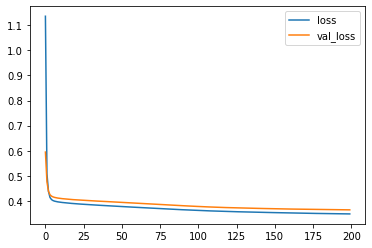

In [81]:
model_loss = pd.DataFrame(model_v4.history.history)
model_loss.plot()

In [82]:
#model prediction
predictions = (model_v4.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[3954   51]
 [ 590  110]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      4005
           1       0.68      0.16      0.26       700

    accuracy                           0.86      4705
   macro avg       0.78      0.57      0.59      4705
weighted avg       0.84      0.86      0.83      4705



86 % accuracy again which is still good. We will go with the 88% one


# Using fewer features 

In [103]:
# Splitting the dataset into train and test for the model
from sklearn.model_selection import train_test_split
X = df[['cellphone_access','education_level','location_type','gender_of_respondent','age_of_respondent']]
y = df['bank_account']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
######
#Reloading the instance
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam')

In [110]:
model.fit(x=X_train, y=y_train, epochs=400,validation_data=(X_test, y_test), verbose=1)

Epoch 1/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3096 - val_loss: 0.3089
Epoch 2/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3092 - val_loss: 0.3077
Epoch 3/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3097 - val_loss: 0.3096
Epoch 4/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3095 - val_loss: 0.3090
Epoch 5/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3095 - val_loss: 0.3089
Epoch 6/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3092 - val_loss: 0.3063
Epoch 7/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3094 - val_loss: 0.3076
Epoch 8/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3094 - val_loss: 0.3092
Epoch 9/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3095 - val_loss: 0.3082
Epoch 10/400
515/515 [==============================] - 1s 2ms/step - loss: 0.3089 - val_lo

array([[0.04728574],
       [0.17056307],
       [0.08677229],
       ...,
       [0.01520041],
       [0.01864308],
       [0.15439713]], dtype=float32)

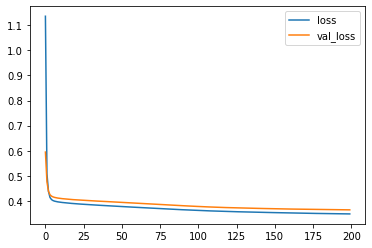

In [111]:
model_loss.plot()
#model prediction
predictions = model.predict(X_test)
predictions


In [113]:
#model review
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix

print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

ValueError: ignored

# The best model is Model one. We will use the test dataset to perfrom the final testing predictions. Just using the varibales with a postive correllations 

In [92]:
#Lets load the set, clean and convert it to numerical values
test.info()#no empty rows
test.duplicated().sum()#no duplicated rows
dfT = test
dfT = dfT.drop(['country','year','uniqueid'], axis = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [95]:
#Moving on to label encoding
#Lets find our object columns 
objList = dfT.select_dtypes(include = "object").columns
#We have to omit the unique id column and country
print (objList)

#Transforming them into integers

for feat in objList:
    dfT[feat] = lb.fit_transform(dfT[feat])

print (dfT.info())



Index(['location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   location_type           10086 non-null  int64
 1   cellphone_access        10086 non-null  int64
 2   household_size          10086 non-null  int64
 3   age_of_respondent       10086 non-null  int64
 4   gender_of_respondent    10086 non-null  int64
 5   relationship_with_head  10086 non-null  int64
 6   marital_status          10086 non-null  int64
 7   education_level         10086 non-null  int64
 8   job_type                10086 non-null  int64
dtypes: int64(9)
memory usage: 709.3 KB
None


In [96]:
#Next step will be to scale the data
scaler.fit(dfT)

dfT = scaler.transform(dfT)

In [97]:
#Lets ensure our model is uptodate(Not necessary)
model.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3055 - val_loss: 0.3250
Epoch 2/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3065 - val_loss: 0.3330
Epoch 3/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3052 - val_loss: 0.3260
Epoch 4/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3058 - val_loss: 0.3256
Epoch 5/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3075 - val_loss: 0.3251
Epoch 6/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3061 - val_loss: 0.3249
Epoch 7/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3060 - val_loss: 0.3237
Epoch 8/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3053 - val_loss: 0.3274
Epoch 9/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3058 - val_loss: 0.3242
Epoch 10/200
589/589 [==============================] - 2s 3ms/step - loss: 0.3056 - val_lo

In [98]:
#model prediction
predictions = model.predict(dfT)
from sklearn.metrics import classification_report,confusion_matrix
predictions


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [100]:
#model review
predictions = (model.predict(dfT) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [101]:
#The above result doesnt tell much, well make a way to enter the units for prediction below
df.head()
#The order is location type, cellphone access, household size, age, gender, relationship with head of household, marital status, education level and job type


,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,3,24,0,5,2,3,9
1,0,0,0,5,70,0,1,4,0,4
2,1,1,1,5,26,1,3,3,5,9
3,0,0,1,5,34,0,1,2,2,3
4,0,1,0,8,26,1,0,3,2,5
